**Créditos**: baseado nun código visto en: https://medium.com/@a.fernandez.troyano/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

Repo orixinal: https://github.com/bigdatawirtz/nubes/blob/main/nube_de_respostas.ipynb

# Facendo unha nube de palabras

## Instalando dependencias

- conda activate bigdata

- conda install numpy pandas

- conda install -c conda-forge wordcloud nltk

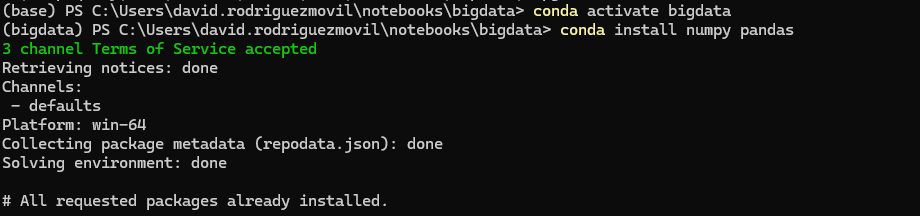

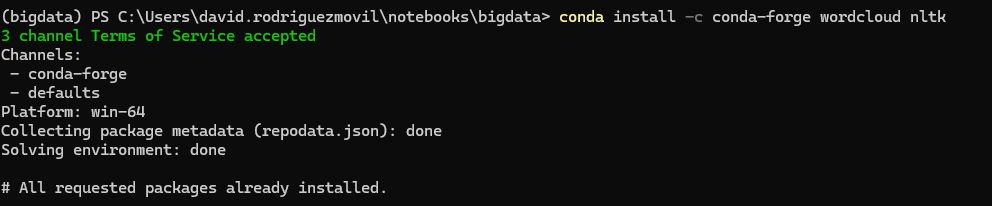

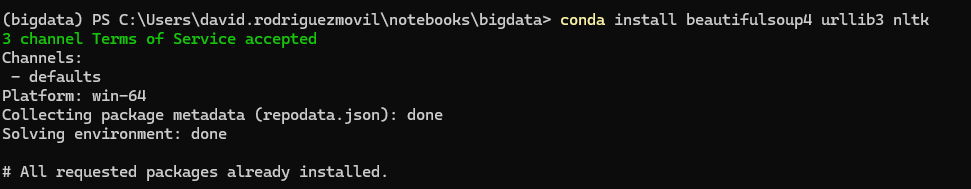

## Cargamos librarías

In [1]:
#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

In [ ]:
#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

Importamos las librerias necesarias para la limpieza de datos

**Carga de texto**

In [ ]:
with open("defino.txt", encoding="utf-8") as 


In [ ]:
texto

Añadimos el texto que vamos a analizar

**Limpeza do texto**

In [ ]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

In [ ]:
#Listado de palabras que queremos eliminar del texto
#Es un proceso iterativo por lo que si después vemos que nos siguen quedado "caractéres raros" simplemente venímos aquí y los agregamos
#Existe librerías y listados de "Stop_words", pero por ahora vamos a dejarlo vacío

#nltk.download('stopwords') #La primera vez debemos descargar las "stopwords"

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


In [ ]:
#Reemplazamos signos de puntuación por "":
for sw in stop_words:
    clean_texto = texto.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
#clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)


In [ ]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

**Contaxe de palabras**

In [ ]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]

In [ ]:
#Generamos el DF y lo ordenamos:

df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

**Mostrar gráfica de ocorrencias das palabras**

In [ ]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

In [ ]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

**Crear nube de palabras**

In [ ]:
#word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()